In [1]:
import numpy as np
import pandas as pd
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
)
from sklearn.model_selection import train_test_split

In [2]:
#load
with open('../data/dataset_for_ML.pickle', 'rb') as f:
    dataset = pickle.load(f)

#load
with open('../data/train.pickle', 'rb') as f:
    train_data = pickle.load(f)
    
#load
with open('../generator/generated_data/index_list_wap_matched.pickle', 'rb') as f:
    index_list_wap_matched = pickle.load(f)

#load
with open('../generator/generated_data/index.pickle', 'rb') as f:
    index = pickle.load(f)

In [3]:
stock_0 = train_data[train_data['stock_id']==0]

dataset_0_copy = dataset[0].copy()
dataset_0_copy['new_index'] = index_list_wap_matched[:-6]
dataset_0_copy['new_index_60'] = index_list_wap_matched[6:]
dataset_0_copy['new_index_ratio'] = dataset_0_copy['new_index_60']/dataset_0_copy['new_index']
dataset_0_copy

,stock_id,date_id,seconds_in_bucket,wap,target,wap_60,index,index_60,index_ratio_real,new_index,new_index_60,new_index_ratio
0,0,0,0,1.000000,-3.029704,1.000517,1.000000,1.000756,1.000820,1.000000,1.000750,1.000750
191,0,0,10,0.999892,0.389814,1.000421,1.000403,1.000811,1.000490,1.000251,1.000732,1.000481
382,0,0,20,0.999842,4.220009,1.000148,1.000527,1.000414,0.999884,1.000441,1.000346,0.999905
573,0,0,30,1.000085,5.450249,1.000426,1.000534,1.000296,0.999796,1.000444,1.000346,0.999902
764,0,0,40,1.000317,3.169775,1.000261,1.000584,1.000207,0.999627,1.000584,1.000319,0.999736
...,...,...,...,...,...,...,...,...,...,...,...,...
5235780,0,480,440,0.998678,4.440546,0.999065,0.999231,0.999154,0.999943,0.998902,0.998867,0.999965
5235980,0,480,450,0.998912,-0.609756,0.998941,0.999127,0.999196,1.000090,0.998803,0.998888,1.000085
5236180,0,480,460,0.999429,-0.640154,0.999289,0.999178,0.999123,0.999924,0.998912,0.998818,0.999906
5236380,0,480,470,0.999294,0.139475,0.999291,0.999134,0.999128,0.999983,0.998836,0.998813,0.999977


In [4]:
train_data

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


           pred   target
pred    1.00000  0.64287
target  0.64287  1.00000


<Axes: xlabel='None', ylabel='target'>

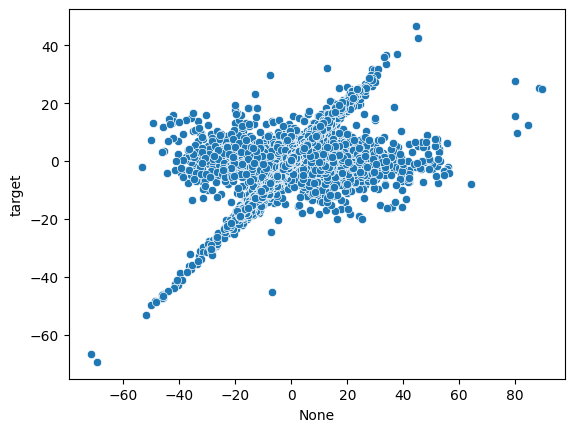

In [5]:
wap_60 = dataset_0_copy['wap_60']
wap = dataset_0_copy['wap']
wap_ratio = wap_60/wap
index = dataset_0_copy['index']
index_60 = dataset_0_copy['index_60']
index_ratio_pred = index_60 / index
index_ratio = dataset_0_copy['index_ratio_real']
target = dataset_0_copy['target']
#print(target)

pred = (wap_ratio - index_ratio_pred)*10000

df = pd.DataFrame(data = pred, columns=['pred'])
df = pd.concat([df,target], axis=1)
print(df.corr())
df = pd.concat([df,wap_ratio], axis=1)
sns.scatterplot(x=pred, y=target)

            pred    target
pred    1.000000  0.641165
target  0.641165  1.000000


<Axes: xlabel='None', ylabel='target'>

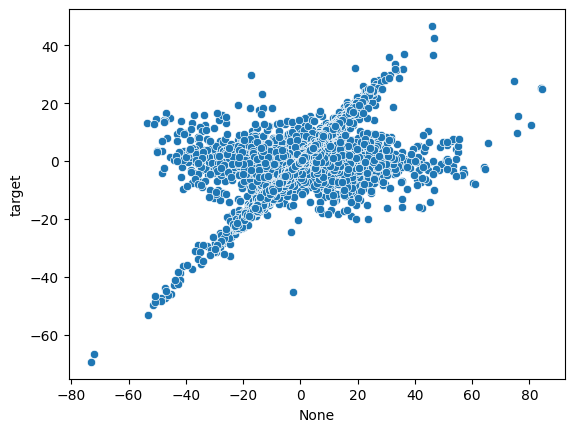

In [6]:
wap_60 = dataset_0_copy['wap_60']
wap = dataset_0_copy['wap']
wap_ratio = wap_60/wap
index = dataset_0_copy['new_index']
index_60 = dataset_0_copy['new_index_60']
index_ratio_pred = index_60 / index
index_ratio = dataset_0_copy['index_ratio_real']
target = dataset_0_copy['target']
#print(target)

pred = (wap_ratio - index_ratio_pred)*10000

df = pd.DataFrame(data = pred, columns=['pred'])
df = pd.concat([df,target], axis=1)
print(df.corr())
df = pd.concat([df,wap_ratio], axis=1)
sns.scatterplot(x=pred, y=target)

         wap_ratio  index_ratio_pred       pred    target  seconds_in_bucket  \
9359      1.000658          0.999056  16.019842  0.189543              490.0   
9550      0.999750          0.998734  10.161138  0.979900              500.0   
9741      0.998860          0.998629   2.305318  0.649691              510.0   
9932      0.998618          0.998428   1.899583  6.779432              520.0   
10123     0.999071          0.998798   2.734182  6.140471              530.0   
...            ...               ...        ...       ...                ...   
5236980        NaN               NaN        NaN       NaN              500.0   
5237180        NaN               NaN        NaN       NaN              510.0   
5237380        NaN               NaN        NaN       NaN              520.0   
5237580        NaN               NaN        NaN       NaN              530.0   
5237780        NaN               NaN        NaN       NaN              540.0   

         imbalance_size  date_id  
9359

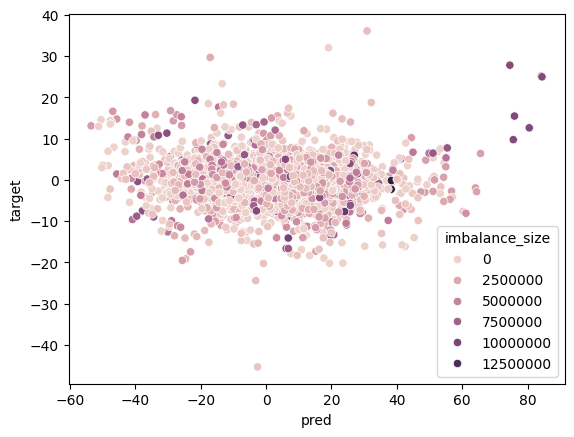

In [7]:
a = pd.DataFrame(data=[wap_ratio, index_ratio_pred, pred,target, stock_0['seconds_in_bucket'], stock_0['imbalance_size'],stock_0['date_id']]).transpose()
a.columns = ['wap_ratio','index_ratio_pred','pred', 'target', 'seconds_in_bucket','imbalance_size','date_id']
a

b= a.query('seconds_in_bucket > 480')
sns.scatterplot(x='pred', y='target', hue='imbalance_size', data=b)
print(b)

<Axes: xlabel='pred', ylabel='target'>

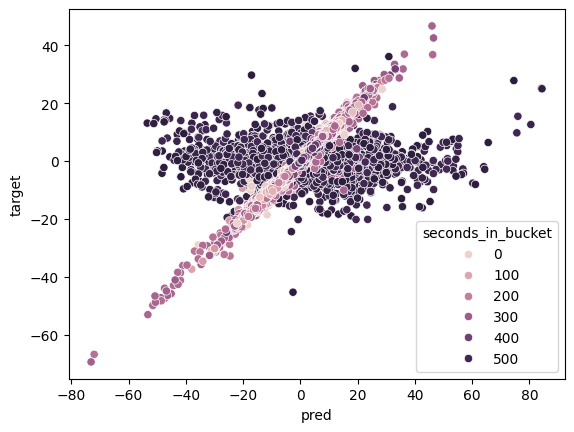

In [8]:
# 코드4: 3차원 - 그룹별 색으로 분류
sns.scatterplot(x='pred', y='target', hue='seconds_in_bucket', 
            data=a)

In [9]:
abs(b.target).mean()

3.7736338018354165

<Axes: xlabel='pred', ylabel='target'>

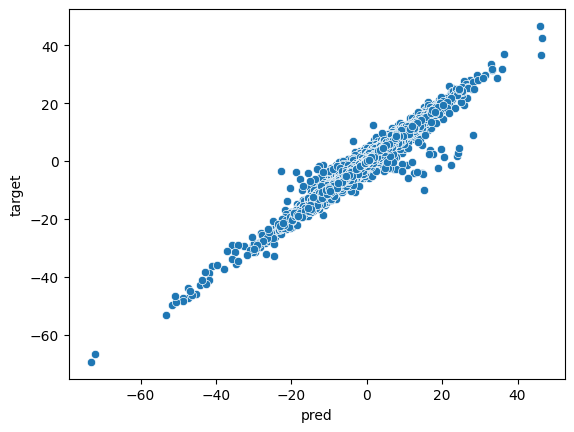

In [10]:
c= a.query('seconds_in_bucket <= 480')
sns.scatterplot(x='pred', y='target', data=c)

<Axes: xlabel='wap', ylabel='wap_60'>

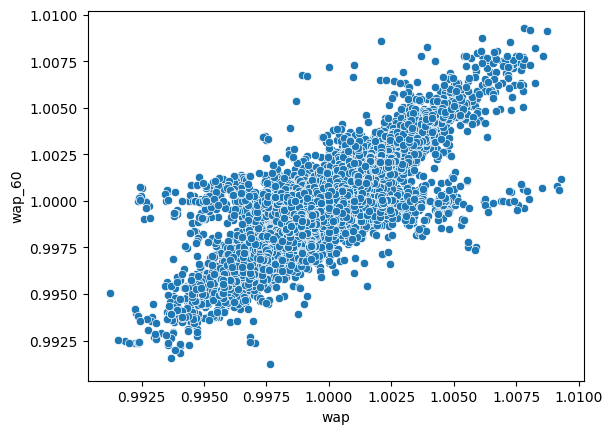

In [11]:
sns.scatterplot(x=wap, y=wap_60)

In [12]:
weights = [
    0.004, 0.001, 0.002, 0.006, 0.004, 0.004, 0.002, 0.006, 0.006, 0.002, 0.002, 0.008,
    0.006, 0.002, 0.008, 0.006, 0.002, 0.006, 0.004, 0.002, 0.004, 0.001, 0.006, 0.004,
    0.002, 0.002, 0.004, 0.002, 0.004, 0.004, 0.001, 0.001, 0.002, 0.002, 0.006, 0.004,
    0.004, 0.004, 0.006, 0.002, 0.002, 0.04 , 0.002, 0.002, 0.004, 0.04 , 0.002, 0.001,
    0.006, 0.004, 0.004, 0.006, 0.001, 0.004, 0.004, 0.002, 0.006, 0.004, 0.006, 0.004,
    0.006, 0.004, 0.002, 0.001, 0.002, 0.004, 0.002, 0.008, 0.004, 0.004, 0.002, 0.004,
    0.006, 0.002, 0.004, 0.004, 0.002, 0.004, 0.004, 0.004, 0.001, 0.002, 0.002, 0.008,
    0.02 , 0.004, 0.006, 0.002, 0.02 , 0.002, 0.002, 0.006, 0.004, 0.002, 0.001, 0.02,
    0.006, 0.001, 0.002, 0.004, 0.001, 0.002, 0.006, 0.006, 0.004, 0.006, 0.001, 0.002,
    0.004, 0.006, 0.006, 0.001, 0.04 , 0.006, 0.002, 0.004, 0.002, 0.002, 0.006, 0.002,
    0.002, 0.004, 0.006, 0.006, 0.002, 0.002, 0.008, 0.006, 0.004, 0.002, 0.006, 0.002,
    0.004, 0.006, 0.002, 0.004, 0.001, 0.004, 0.002, 0.004, 0.008, 0.006, 0.008, 0.002,
    0.004, 0.002, 0.001, 0.004, 0.004, 0.004, 0.006, 0.008, 0.004, 0.001, 0.001, 0.002,
    0.006, 0.004, 0.001, 0.002, 0.006, 0.004, 0.006, 0.008, 0.002, 0.002, 0.004, 0.002,
    0.04 , 0.002, 0.002, 0.004, 0.002, 0.002, 0.006, 0.02 , 0.004, 0.002, 0.006, 0.02,
    0.001, 0.002, 0.006, 0.004, 0.006, 0.004, 0.004, 0.004, 0.004, 0.002, 0.004, 0.04,
    0.002, 0.008, 0.002, 0.004, 0.001, 0.004, 0.006, 0.004,
]